In [2]:
import re
import requests
import numpy as np
import json

In [734]:
r = requests.get('http://map.amap.com/service/subway?_1469083453978&srhdata=1100_drw_beijing.json')
r_json = json.loads(r.text)
#第一层包含：地铁名称's','i',线路列表'l','o'
#线路列表
#print(r_json['l'])

#第二层线路列表包含：站列表'st',线路简称'ln','su',线路全称'kn','c','lo','lp','f','ls','cl','la','x','li'
#线路1名称
#line_1 = r_json['l'][0]
#print(line_1['ln'])

#第三层站列表包含：'rs','udpx','su','udsu',站名称'n','sid','p','r','udsi','t','si',经纬度'sl','udli','poiid','lg',站名称拼音'sp'
#print(r_json['l'][0]['st'][0])

#线路1上的站名称
#line_1_station_name_list = ','.join(i['n'] for i in line_1['st'])
#print("线路'{}'上的站名称:{}".format(line_1['kn'],line_1_station_name_list))
#r_json

In [735]:
def get_lines_stations_info(text):
    # 请在这里写上你的代码
    pass
    obj = json.loads(text)   
    # 遍历text格式数据，组成地点数据结构
    # 所有线路信息的dict：key：线路名称；value：站点名称list
    lines_info = {}    
    # 所有站点信息的dict：key：站点名称；value：站点坐标(x,y)
    stations_info = {}
    #for i in range(len(lines_list)):
        # 你可能需要思考的几个问题，获取「地铁线路名称，站点信息list，站名，坐标(x,y)，数据加入站点的信息dict，将数据加入地铁线路dict」
    pass
    for line in obj['l']:
        line_name = line['kn']
        lines_info[line_name] = [i['n'] for i in line['st']]
        for i in line['st']:
            x_y = re.findall("(\d+.\d+),(\d+.\d+)",i['sl'])[0]
            stations_info[i['n']] = tuple(map(float,x_y))
    return lines_info, stations_info

lines_info, stations_info = get_lines_stations_info(r.text)
#lines_info

In [6]:
#stations_info

In [736]:
from collections import defaultdict
# 根据线路信息，建立站点邻接表dict
def get_neighbor_info(lines_info):
    pass
    # 把str2加入str1站点的邻接表中
    def add_neighbor_dict(info, str1, str2):
        # 请在这里写代码
        pass
        info[str1].append(str2) 
    
    neighbor_info = defaultdict(list)
    for station_list in lines_info.values():
        for i in range(len(station_list)):
            station = station_list[i]
            if i == 0:
                add_neighbor_dict(neighbor_info,station,station_list[i+1])
            elif i == len(station_list)-1:
                add_neighbor_dict(neighbor_info,station,station_list[i-1])
            else:
                add_neighbor_dict(neighbor_info,station,station_list[i-1])
                add_neighbor_dict(neighbor_info,station,station_list[i+1])
    return neighbor_info
        
neighbor_info = get_neighbor_info(lines_info)
neighbor_info

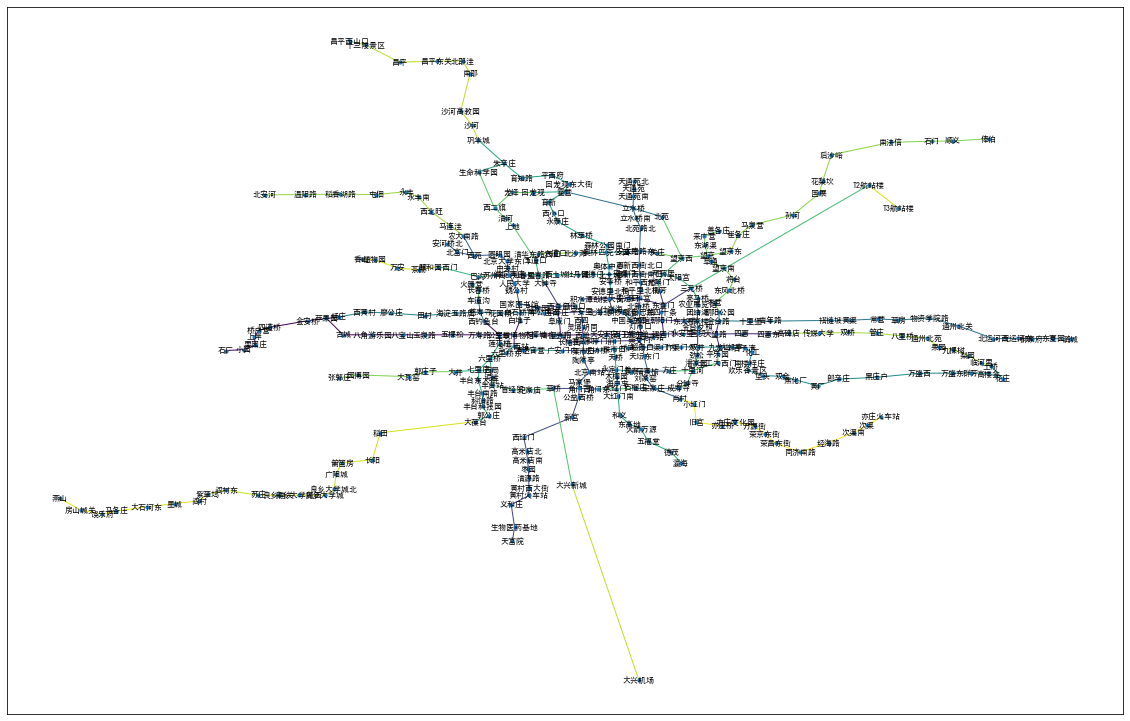

In [373]:
# 画地铁图
import networkx as nx
import matplotlib.pyplot as plt,mpld3

# 如果汉字无法显示，请参照
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['font.family']='sans-serif'
plt.figure(figsize=(20, 13))#画布大小
station_connection_graph = nx.Graph(neighbor_info)
colors = range(len(list(station_connection_graph.edges)))
#edges = nx.draw_networkx_edges(station_connection_graph,stations_info,edge_color=colors,width=2)
#plt.colorbar(edges)
nx.draw_networkx(station_connection_graph,stations_info,with_labels=True,node_size=10,font_size=8)
plt.show()

In [875]:
def check_station_name(station):
    if station not in stations_info:
        return stations_info
    return True
#print(check_station_name('前门'))

In [874]:
#获取站点直线距离
def get_distance(stations_info,current_station,to_station):
    current_x_y = stations_info[current_station]
    to_x_y = stations_info[to_station]
    return geo_distance(current_x_y,to_x_y)
#get_distance(stations_info,'前门','中关村')

In [729]:
#获取站点所在线路
def get_lines_by_station(lines_info,station):
    lines = []
    for line in lines_info:
        if station in lines_info[line]:
            lines.append(line)
    return lines
#get_lines_by_station(lines_info,'中关村')

In [878]:
from collections import defaultdict
#获取换乘站
def get_crossLine_station(lines_info):
    station_in_lines = defaultdict(list) 
    crossLine_station = defaultdict(list) 
    for line in lines_info:
        line_station_list = lines_info[line]
        for station in lines_info[line]:
            station_in_lines[station].append(line)
    for station in station_in_lines:
        if len(station_in_lines[station])>1:
            crossLine_station[station] = station_in_lines[station]
    return crossLine_station
crossLine_station = get_crossLine_station(lines_info)
#crossLine_station

In [732]:
#获取交叉线路
def get_crossLine(lines_info):
    crossLine_station = get_crossLine_station(lines_info)
    crossLine = defaultdict(list)
    for line in lines_info:
        temp = set()
        for station in crossLine_station:
            if line in crossLine_station[station]:
                for i in range(len(crossLine_station[station])):
                    if line == crossLine_station[station][i]: continue
                    temp.add(crossLine_station[station][i])
        crossLine[line]=list(temp)
    return crossLine
#get_crossLine(lines_info)

In [ ]:
def get_next_station_DFS_ALL(node, neighbor_info, to_station):
    pass
    neighbors = neighbor_info[to_station]
    smallest_index = node.index(to_station)
    for neighbor in neighbors:
        smallest_index = min(smallest_index,node.index(neighbor))
    return node[smallest_index]
#get_next_station_DFS_ALL(path_All,neighbor_info,'中关村')

In [873]:
# 你可以用递归查找所有路径
def get_path_DFS_ALL(lines_info, neighbor_info, from_station, to_station):
    # 递归算法，本质上是深度优先
    # 遍历所有路径
    # 这种情况下，站点间的坐标距离难以转化为可靠的启发函数，所以只用简单的BFS算法
    # 检查输入站点名称
    pass
    if check_station_name(from_station)==None or check_station_name(to_station)==None:
        return
    stack_node = [from_station]
    visited = set()
    node = []
    path = []
    while stack_node:
        current = stack_node.pop(-1)
        if current not in visited:node.append(current)
        visited.add(current)
        neighbors = neighbor_info[current]
        for neighbor in neighbors:
            if neighbor in visited:continue
            stack_node.append(neighbor)
    #从终点站逆推
    recursion_station = to_station
    while recursion_station != from_station:
        path=[recursion_station]+path
        recursion_station = get_next_station_DFS_ALL(node,neighbor_info,recursion_station)
    return [from_station]+path
print('DFS_ALL:')
get_path_DFS_ALL(lines_info,neighbor_info,'前门','中关村')

DFS_ALL:


['前门',
 '和平门',
 '宣武门',
 '西单',
 '灵境胡同',
 '西四',
 '平安里',
 '车公庄',
 '车公庄西',
 '白石桥南',
 '国家图书馆',
 '魏公村',
 '人民大学',
 '海淀黄庄',
 '中关村']

In [741]:
#不遍历，遇到终点马上输出路线
def get_path_DFS(neighbor_info,from_station,to_station):
    stack_node = [from_station]
    visited = set()
    path = []
    while stack:
        current = stack.pop(-1)
        visited.add(current)
        path.append(current)
        neighbors = neighbor_info[current]
        for neighbor in neighbors:
            if neighbor in visited:continue
            if neighbor == to_station:
                path.append(to_station)
                return path
            stack = stack+[neighbor]

In [665]:
#get_path_DFS(neighbor_info,'石门','燕山')

In [872]:
#  你也可以使用第二种算法：没有启发函数的简单宽度优先

def get_path_BFS(lines_info, neighbor_info, from_station, to_station):
    # 搜索策略：以站点数量为cost（因为车票价格是按站算的）
    # 这种情况下，站点间的坐标距离难以转化为可靠的启发函数，所以只用简单的BFS算法
    # 由于每深一层就是cost加1，所以每层的cost都相同，算和不算没区别，所以省略
    # 检查输入站点名称
    pass
    if check_station_name(from_station)==None or check_station_name(to_station)==None:
        return
    queue_path = [[from_station]]
    #visited是关键，若某一探索线路的下一站已经在visited中，
    #说明之前的探索线路已经到达，而且层数比它还小，因此舍弃这条线路，迅速减少stack_path规模
    visited = set()
    while queue_path:
        path = queue_path.pop(0)
        node = path[-1]
        neighbors = neighbor_info[node]
        for neighbor in neighbors:
            if neighbor in path or neighbor in visited:continue
            if neighbor==to_station:
                return path+[neighbor]
            queue_path.append(path+[neighbor])
            visited.add(neighbor)
print('BFS:')
get_path_BFS(lines_info,neighbor_info,'前门','中关村')

BFS:


['前门',
 '和平门',
 '宣武门',
 '长椿街',
 '复兴门',
 '阜成门',
 '车公庄',
 '西直门',
 '大钟寺',
 '知春路',
 '知春里',
 '海淀黄庄',
 '中关村']

In [676]:
#任选某一起点，寻找最深层数的站点及其路径
def get_deapest_station(neighbor_info, from_station):
    pass
    stack_path = [[from_station]]
    path = []
    #visited是关键，若某一探索线路的下一站已经在visited中，
    #说明之前的探索线路已经到达，而且层数比它还小，因此舍弃这条线路，迅速减少stack_path规模
    visited = set()
    while stack_path:
        path = stack_path.pop(0)
        node = path[-1]
        neighbors = neighbor_info[node]
        for neighbor in neighbors:
            if neighbor in path or neighbor in visited:continue
            stack_path.append(path+[neighbor])
            visited.add(neighbor)
    return path
#get_path_BFS_ALL(neighbor_info,'八宝山')

In [677]:
import math

def geo_distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [852]:
def get_next_station(came_from,to_station):
    return came_from[to_station]
def priority_Astar(stations_info,neighbor,to_station):
    return get_distance(stations_info,neighbor,to_station)

In [893]:
# 你还可以用第三种算法：以路径路程为cost的启发式搜索
from queue import PriorityQueue
import pandas as pd
def get_path_Astar(lines_info, neighbor_info, stations_info, from_station, to_station):
    # 搜索策略：以路径的站点间直线距离累加为cost，以当前站点到目标的直线距离为启发函数
    # 检查输入站点名称
    pass
    if check_station_name(from_station)==None or check_station_name(to_station)==None:
        return
    #记录遍历站点
    frontier = PriorityQueue()
    frontier.put((0,from_station))
    #记录站点（如A）对应上一站的名称。如果current站点的下一站为A，且累计cost比A当前的上一站cost少，更新current站点为站A的上一站。
    came_from = {}
    came_from[from_station]=from_station
    #记录站点（如A）累计cost。
    cost = {}
    cost[from_station]=0
    while frontier:
        current_station = frontier.get()[1]
        if current_station == to_station:
            pre_station = to_station
            full_path = [to_station+' 累计行程:{}'.format(cost[to_station])]
            while pre_station!=from_station:
                pre_station = get_next_station(came_from,pre_station)
                full_path = [pre_station+' 累计行程:{}'.format(cost[pre_station])]+full_path
            return full_path
        neighbors = neighbor_info[current_station]
        for neighbor in neighbors:
            #从cost[current_station]获取当前站点累计cost，再加上当前站点到邻接点的距离，获得邻接点的新累计cost。
            new_cost = get_distance(stations_info,current_station,neighbor)+cost[current_station]
            #如果cost中没有该邻接点，说明第一次到达。如果有，比较此次新cost与之前的累计cost的大小，小的话，替换邻接点的上一站为current站，并更新cost。
            if neighbor not in cost or cost[neighbor]>new_cost:
                cost[neighbor] = new_cost
                came_from[neighbor] = current_station
                priority = priority_Astar(stations_info,neighbor,to_station)
                frontier.put((priority,neighbor))
print('Astar:')
get_path_Astar(lines_info,neighbor_info,stations_info,'前门','中关村')

Astar:


['前门 累计行程:0',
 '和平门 累计行程:1.5264910232684803',
 '宣武门 累计行程:2.6268878145617993',
 '长椿街 累计行程:3.8455833208043932',
 '复兴门 累计行程:4.663672668648559',
 '阜成门 累计行程:5.481012098757123',
 '车公庄 累计行程:5.948608440891529',
 '车公庄西 累计行程:7.091141387040008',
 '白石桥南 累计行程:9.137534223173322',
 '国家图书馆 累计行程:9.638159837971878',
 '魏公村 累计行程:10.399633579363602',
 '人民大学 累计行程:10.891217048813425',
 '海淀黄庄 累计行程:11.505590984655251',
 '中关村 累计行程:11.918164107459237']

In [891]:
def get_path_Shortest_Path(lines_info,neighbor_info, stations_info, from_station, to_station):
    # 检查输入站点名称
    pass
    if check_station_name(from_station)==None or check_station_name(to_station)==None:
        return
    #记录遍历站点
    frontier = PriorityQueue()
    frontier.put((0,from_station))
    #记录站点（如A）对应上一站的名称。如果current站点的下一站为A，且累计cost比A当前的上一站cost少，更新current站点为站A的上一站。
    came_from = {}
    came_from[from_station]=from_station
    #记录站点（如A）累计cost。
    cost = {}
    cost[from_station]=0
    while frontier:
        current_station = frontier.get()[1]
        if current_station == to_station:
            pre_station = to_station
            full_path = [to_station+' 累计行程:{}'.format(cost[to_station])]
            while pre_station!=from_station:
                pre_station = get_next_station(came_from,pre_station)
                full_path = [pre_station+' 累计行程:{}'.format(cost[pre_station])]+full_path
            return full_path
        neighbors = neighbor_info[current_station]
        for neighbor in neighbors:
            #从cost[current_station]获取当前站点累计cost，再加上当前站点到邻接点的距离，获得邻接点的新累计cost。
            new_cost = get_distance(stations_info,current_station,neighbor)+cost[current_station]
            #根据不同策略调整priority值
            if neighbor not in cost or cost[neighbor]>new_cost:
                cost[neighbor] = new_cost
                came_from[neighbor] = current_station
                priority = get_distance(stations_info,current_station,neighbor)
                frontier.put((priority,neighbor))
print('Shortest_Path:')
get_path_Shortest_Path(lines_info,neighbor_info,stations_info,'前门','中关村')

Shortest_Path:


['前门 累计行程:0',
 '和平门 累计行程:1.5264910232684803',
 '宣武门 累计行程:2.6268878145617993',
 '西单 累计行程:3.0041498118066516',
 '灵境胡同 累计行程:3.4270033592226183',
 '西四 累计行程:3.8392651901051824',
 '平安里 累计行程:4.323097895068687',
 '新街口 累计行程:4.9840653061277695',
 '西直门 累计行程:6.35357517608552',
 '大钟寺 累计行程:8.077700573338015',
 '知春路 累计行程:8.831700123342245',
 '知春里 累计行程:10.082773851165168',
 '海淀黄庄 累计行程:11.322153367166804',
 '中关村 累计行程:11.73472648997079']

In [892]:
def is_exchange_station(lines_info,pre_station,current_station,neighbor):
    lines_pre_station = get_lines_by_station(lines_info,pre_station)
    lines_current_station = get_lines_by_station(lines_info,current_station)
    lines_neighbor = get_lines_by_station(lines_info,neighbor)
    line_from = set(lines_pre_station)&set(lines_current_station)
    line_to=set(lines_current_station)&set(lines_neighbor)
    return 0 if line_from == line_to else 1

In [890]:
def get_path_Minimum_Transfer(lines_info,neighbor_info, stations_info, from_station, to_station):
    # 检查输入站点名称
    pass
    if check_station_name(from_station)==None or check_station_name(to_station)==None:
        return
    #记录遍历站点
    frontier = PriorityQueue()
    frontier.put((0,from_station))
    #记录站点（如A）对应上一站的名称。如果current站点的下一站为A，且累计cost比A当前的上一站cost少，更新current站点为站A的上一站。
    came_from = {}
    came_from[from_station]=from_station
    #记录站点（如A）累计cost。
    cost = {}
    cost[from_station]=0
    while frontier:
        current_station = frontier.get()[1]
        if current_station == to_station:
            pre_station = to_station
            full_path = [to_station+' 累计换乘:{}'.format(cost[to_station])]
            while pre_station!=from_station:
                pre_station = get_next_station(came_from,pre_station)
                full_path = [pre_station+' 累计换乘:{}'.format(cost[pre_station])]+full_path
            return full_path
        neighbors = neighbor_info[current_station]
        for neighbor in neighbors:
            #从cost[current_station]获取当前站点累计cost，再加上当前站点到邻接点的距离，获得邻接点的新累计cost。
            new_cost = is_exchange_station(lines_info,came_from[current_station],current_station,neighbor)+cost[current_station]
            #根据不同策略调整priority值
            if neighbor not in cost or cost[neighbor]>new_cost:
                cost[neighbor] = new_cost
                came_from[neighbor] = current_station
                priority = is_exchange_station(lines_info,came_from[current_station],current_station,neighbor)
                frontier.put((priority,neighbor))
print('Minimum_Transfer_Path:')
get_path_Minimum_Transfer(lines_info,neighbor_info,stations_info,'前门','中关村')

Minimum_Transfer_Path:


['前门 累计换乘:0',
 '和平门 累计换乘:0',
 '宣武门 累计换乘:0',
 '长椿街 累计换乘:0',
 '复兴门 累计换乘:0',
 '阜成门 累计换乘:0',
 '车公庄 累计换乘:0',
 '西直门 累计换乘:0',
 '动物园 累计换乘:1',
 '国家图书馆 累计换乘:1',
 '魏公村 累计换乘:1',
 '人民大学 累计换乘:1',
 '海淀黄庄 累计换乘:1',
 '中关村 累计换乘:1']